In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# `hpcc`

In [247]:
# read the hpcc.csv file

df = pd.read_csv('hpcc.csv')
df.head()

,RUN,VM1,VM2,VM3,C1,C2,C3,H1,H2,H3
0,MPI_Wtick,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09
1,HPL_Tflops,0.00514137,0.00512789,0.00511576,0.00552649,0.00559106,0.0055386,0.00548935,0.00551584,0.00554237
2,HPL_time,1093.2,1096.07,1098.67,1017.02,1005.27,1014.79,1023.9,1018.98,1014.1
3,HPL_eps,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16
4,HPL_RnormI,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09


In [248]:
# Multiply row 1 by 10^3
df.iloc[1, 1:] = pd.to_numeric(df.iloc[1, 1:]) * 10**3

# Rename the row
df.iloc[1, 0] = "HPL_Gflops"

df.head()

,RUN,VM1,VM2,VM3,C1,C2,C3,H1,H2,H3
0,MPI_Wtick,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09
1,HPL_Gflops,5.14137,5.12789,5.11576,5.52649,5.59106,5.5386,5.48935,5.51584,5.54237
2,HPL_time,1093.2,1096.07,1098.67,1017.02,1005.27,1014.79,1023.9,1018.98,1014.1
3,HPL_eps,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16
4,HPL_RnormI,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09


In [249]:
df['VM_mean'] = df[['VM1', 'VM2', 'VM3']].apply(lambda x: pd.to_numeric(x, errors='coerce')).mean(axis=1)
df['C_mean'] = df[['C1', 'C2', 'C3']].apply(lambda x: pd.to_numeric(x, errors='coerce')).mean(axis=1)
df['H_mean'] = df[['H1', 'H2', 'H3']].apply(lambda x: pd.to_numeric(x, errors='coerce')).mean(axis=1)
df = df[['RUN', 'VM_mean', 'C_mean', 'H_mean']]
df.columns = ['Metric', 'VM', 'Container', 'Host']
df.head()

,Metric,VM,Container,Host
0,MPI_Wtick,1.000000e-09,1.000000e-09,1.000000e-09
1,HPL_Gflops,5.128340e+00,5.552050e+00,5.515853e+00
2,HPL_time,1.095980e+03,1.012360e+03,1.018993e+03
3,HPL_eps,1.110000e-16,1.110000e-16,1.110000e-16
4,HPL_RnormI,4.670000e-09,4.670000e-09,4.670000e-09


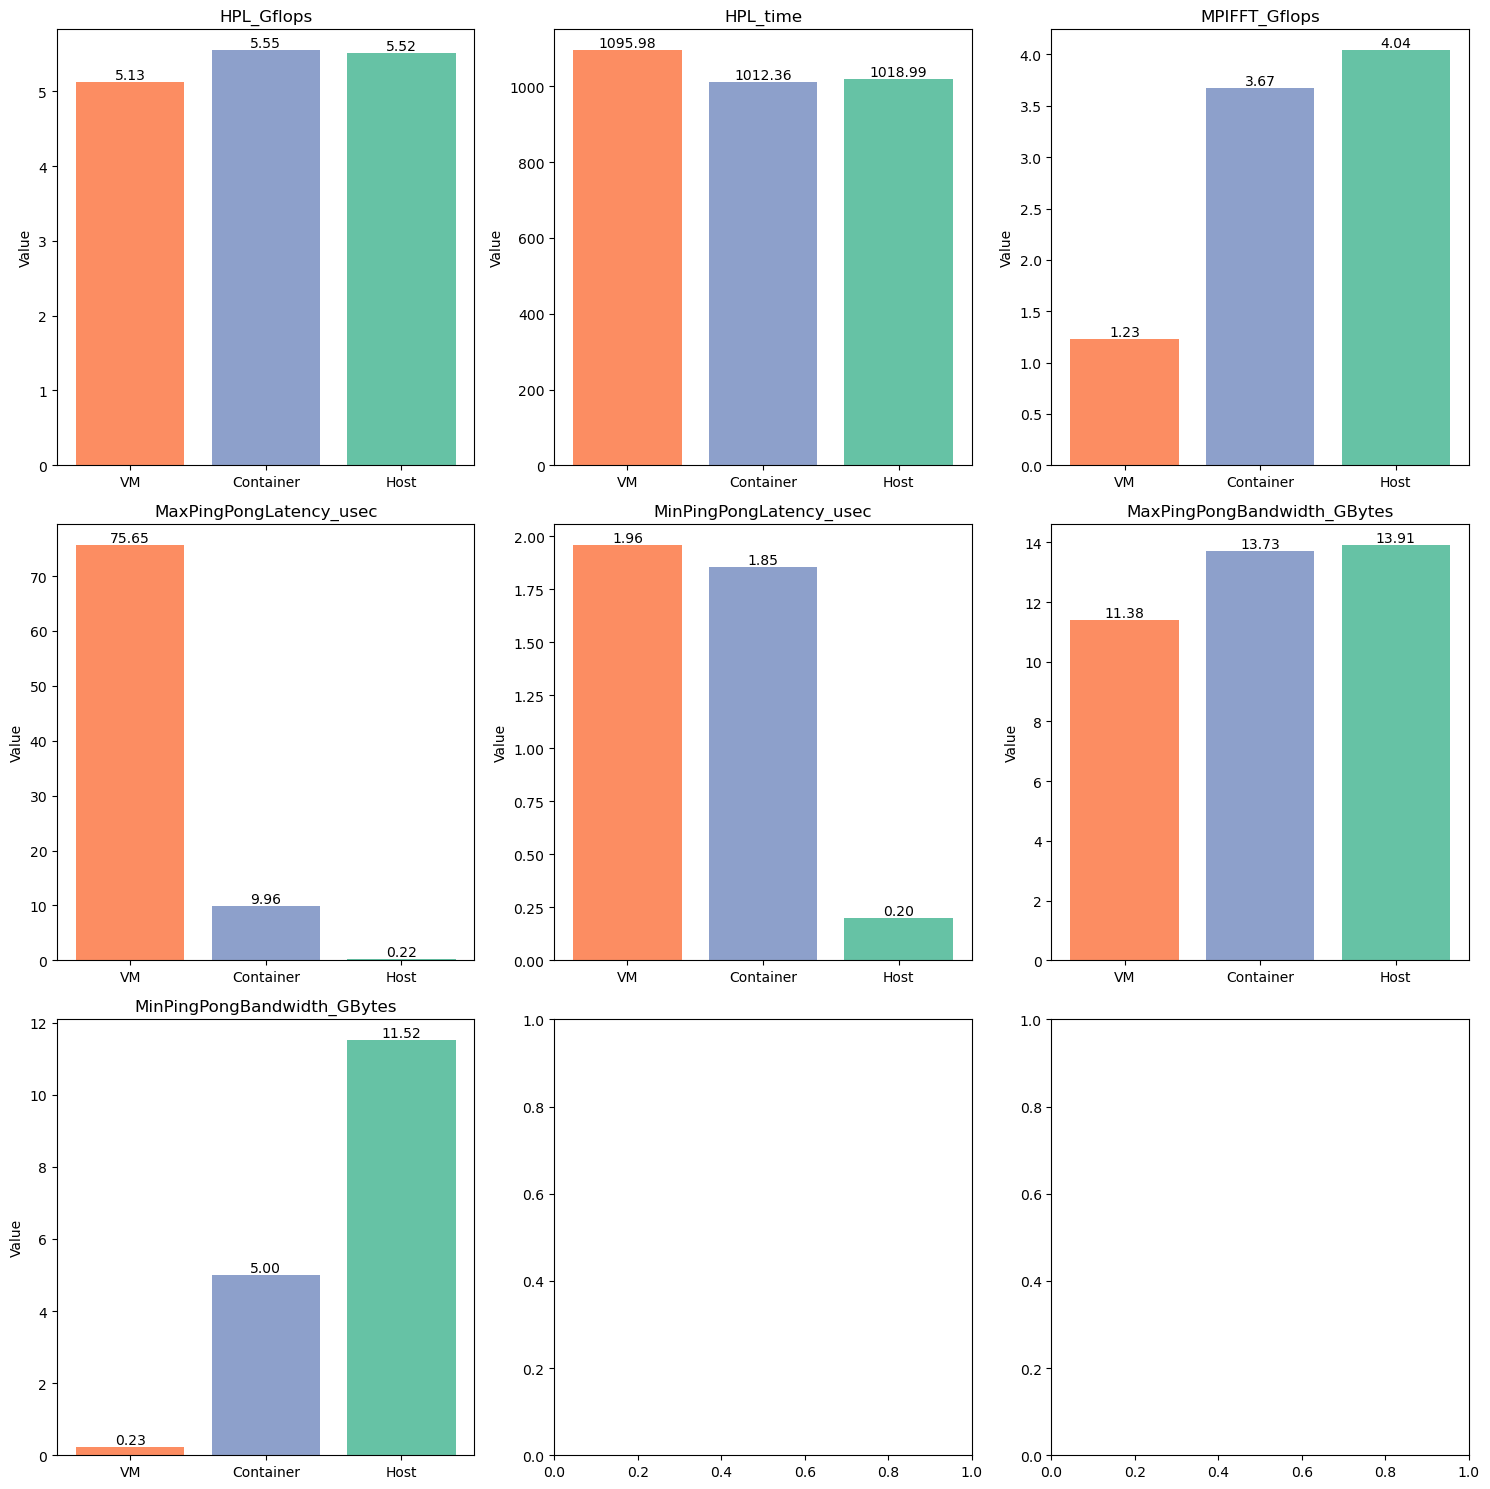

In [250]:
# List of metrics to plot
metrics = [
    "HPL_Gflops", "HPL_time", "MPIFFT_Gflops", "MaxPingPongLatency_usec", 
    "MinPingPongLatency_usec", "MaxPingPongBandwidth_GBytes","MinPingPongBandwidth_GBytes"
]

# Filter the dataframe for the specified metrics
filtered_df = df[df['Metric'].isin(metrics)]

# Set up the subplots
num_metrics = len(metrics)
fig, axes = plt.subplots(nrows=(num_metrics + 2) // 3, ncols=3, figsize=(15, 5 * ((num_metrics + 2) // 3)))
axes = axes.flatten()
# Define colors for each support type
palette = sns.color_palette("Set2", 3)  # You can try "Set1", "pastel", "colorblind", etc.

# Plot each metric
for i, metric in enumerate(metrics):
    if metric in filtered_df['Metric'].values:
        row = filtered_df[filtered_df['Metric'] == metric]
        bars = axes[i].bar(['VM', 'Container', 'Host'], row[['VM', 'Container', 'Host']].values[0], color=[palette[1], palette[2], palette[0]])
        for bar in bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')
        axes[i].set_title(metric)
        axes[i].set_ylabel('Value')
    else:
        axes[i].axis('off')  # Hide unused subplot

# Adjust layout
plt.tight_layout()
plt.show()

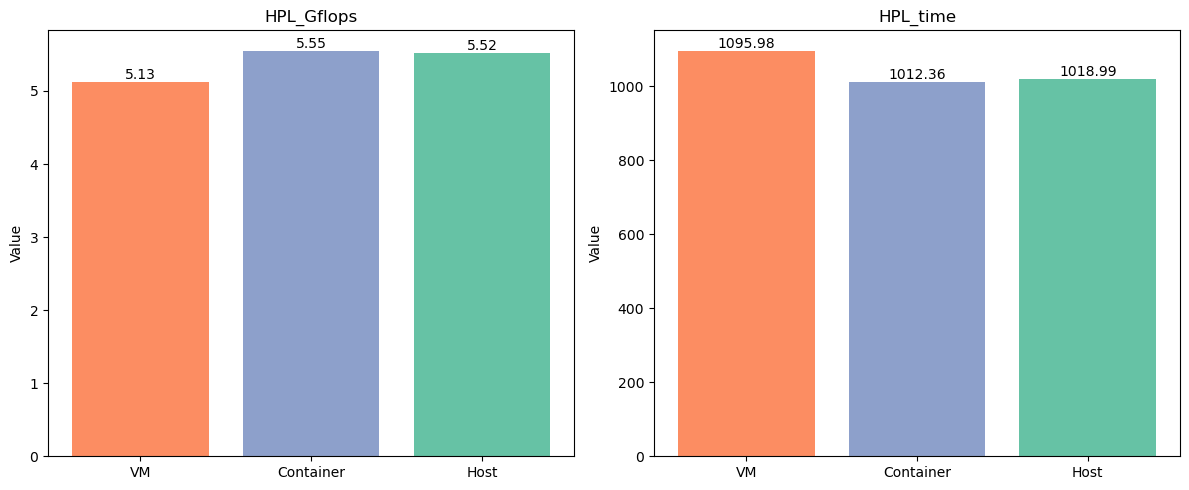

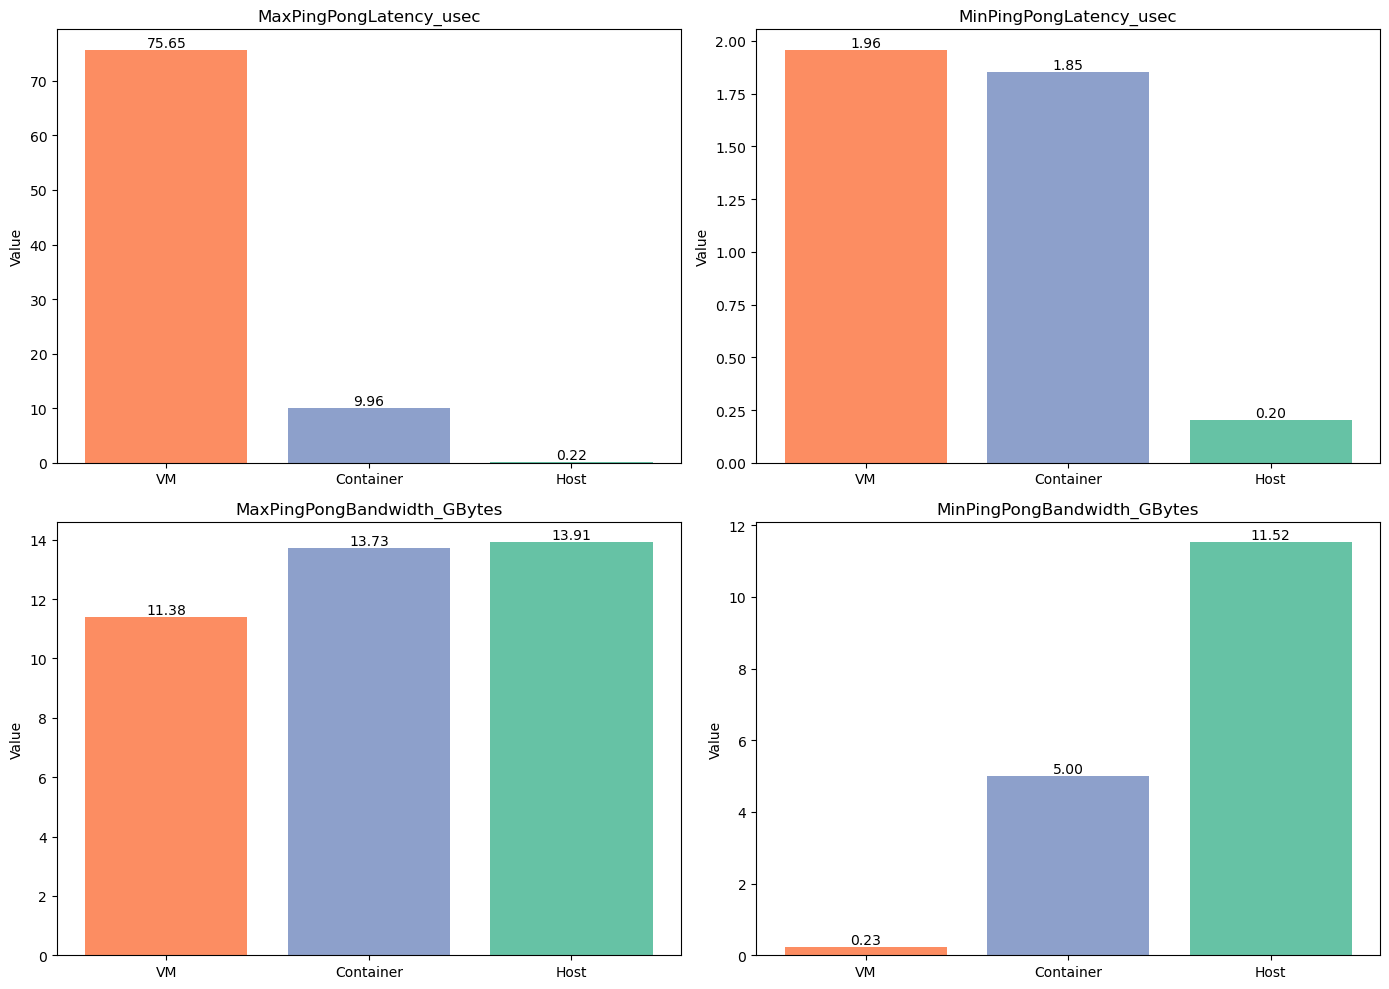

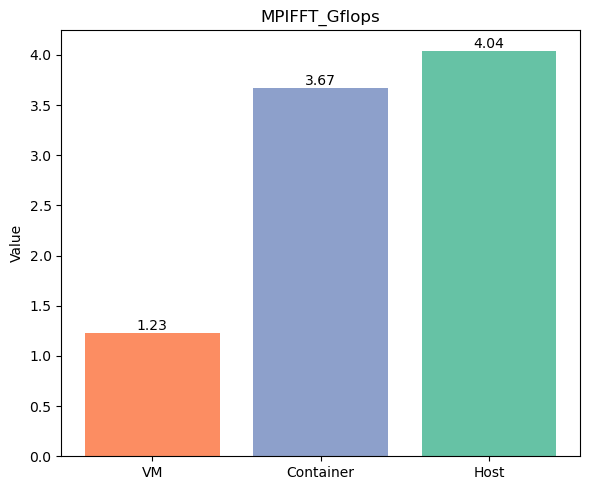

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors: VM, Container, Host
palette = sns.color_palette("Set2", 3)
color_order = [palette[1], palette[2], palette[0]]  # VM, Container, Host

# Helper function to plot a single bar chart
def plot_metric(ax, row, metric, colors=color_order):
    bars = ax.bar(['VM', 'Container', 'Host'], row[['VM', 'Container', 'Host']].values[0], color=colors)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')
    ax.set_title(metric)
    ax.set_ylabel('Value')

# === Plot 1: HPL_Gflops and HPL_time ===
hpl_metrics = ["HPL_Gflops", "HPL_time"]
fig1, axes1 = plt.subplots(1, 2, figsize=(12, 5))
for i, metric in enumerate(hpl_metrics):
    row = df[df['Metric'] == metric]
    plot_metric(axes1[i], row, metric)
plt.tight_layout()
plt.show()

# === Plot 2: 2x2 of PingPong metrics ===
pingpong_metrics = [
    "MaxPingPongLatency_usec", "MinPingPongLatency_usec",
    "MaxPingPongBandwidth_GBytes", "MinPingPongBandwidth_GBytes"
]
fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))
axes2 = axes2.flatten()
for i, metric in enumerate(pingpong_metrics):
    row = df[df['Metric'] == metric]
    plot_metric(axes2[i], row, metric)
plt.tight_layout()
plt.show()

# === Plot 3: MPIFFT_Gflops ===
mpifft_metric = "MPIFFT_Gflops"
fig3, ax3 = plt.subplots(figsize=(6, 5))
row = df[df['Metric'] == mpifft_metric]
plot_metric(ax3, row, mpifft_metric)
plt.tight_layout()
plt.show()


# `stress-ng`

In [252]:
stress_df = pd.read_csv('stress.csv')
stress_df.head()
stress_df['stressor'] = stress_df['stressor'].replace('vm', 'memory')
stress_df.head()
len(stress_df)

180

In [253]:
# Remove commas before converting to numeric
stress_df['Bogo Ops/s (Real Time)'] = pd.to_numeric(stress_df['Bogo Ops/s (Real Time)'].str.replace(',', ''), errors='raise')
stress_df['Bogo Ops/s (Usr+Sys Time)'] = pd.to_numeric(stress_df['Bogo Ops/s (Usr+Sys Time)'].str.replace(',', ''), errors='raise')

In [254]:
stress_df = stress_df[(stress_df['Bogo Ops/s (Real Time)'] <= 1e6) & (stress_df['Bogo Ops/s (Usr+Sys Time)'] <= 1e6)]
stress_df.head()
len(stress_df)

175

In [255]:
vm_cpu_df = stress_df[(stress_df['Support'] == 'vm') & (stress_df['stressor'] == 'cpu')]
vm_cpu_df = vm_cpu_df.drop(columns=['Support', 'stressor','Run'])
c_cpu_df = stress_df[(stress_df['Support'] == 'container') & (stress_df['stressor'] == 'cpu')]
c_cpu_df = c_cpu_df.drop(columns=['Support', 'stressor','Run'])
host_cpu_df = stress_df[(stress_df['Support'] == 'host') & (stress_df['stressor'] == 'cpu')]
host_cpu_df = host_cpu_df.drop(columns=['Support', 'stressor','Run'])


cpu_data = pd.DataFrame({
    'Bogo Ops/s': pd.concat([
        vm_cpu_df['Bogo Ops/s (Real Time)'],
        c_cpu_df['Bogo Ops/s (Real Time)'],
        host_cpu_df['Bogo Ops/s (Real Time)'],
        vm_cpu_df['Bogo Ops/s (Usr+Sys Time)'],
        c_cpu_df['Bogo Ops/s (Usr+Sys Time)'],
        host_cpu_df['Bogo Ops/s (Usr+Sys Time)']
    ]),
    'Type': (
        ['VM'] * len(vm_cpu_df) + 
        ['Container'] * len(c_cpu_df) + 
        ['Host'] * len(host_cpu_df) +
        ['VM'] * len(vm_cpu_df) + 
        ['Container'] * len(c_cpu_df) + 
        ['Host'] * len(host_cpu_df)
    ),
    'Metric': (
        ['Real Time'] * len(vm_cpu_df) + 
        ['Real Time'] * len(c_cpu_df) + 
        ['Real Time'] * len(host_cpu_df) +
        ['Usr+Sys Time'] * len(vm_cpu_df) + 
        ['Usr+Sys Time'] * len(c_cpu_df) + 
        ['Usr+Sys Time'] * len(host_cpu_df)
    )
})

cpu_data.head()

,Bogo Ops/s,Type,Metric
0,933.13,VM,Real Time
1,930.14,VM,Real Time
2,929.84,VM,Real Time
3,929.57,VM,Real Time
4,907.39,VM,Real Time


In [256]:
# Filter for VM and Container with 'memory' as stressor
vm_mem_df = stress_df[(stress_df['Support'] == 'vm') & (stress_df['stressor'] == 'memory')]
c_mem_df = stress_df[(stress_df['Support'] == 'container') & (stress_df['stressor'] == 'memory')]
host_mem_df = stress_df[(stress_df['Support'] == 'host') & (stress_df['stressor'] == 'memory')]

# Build the new dataframe
memory_data = pd.DataFrame({
    'Bogo Ops/s': pd.concat([
        vm_mem_df['Bogo Ops/s (Real Time)'],
        c_mem_df['Bogo Ops/s (Real Time)'],
        host_mem_df['Bogo Ops/s (Real Time)'],
        vm_mem_df['Bogo Ops/s (Usr+Sys Time)'],
        c_mem_df['Bogo Ops/s (Usr+Sys Time)'],
        host_mem_df['Bogo Ops/s (Usr+Sys Time)']
    ]),
    'Type': (
        ['VM Memory'] * len(vm_mem_df) + ['Container Memory'] * len(c_mem_df) +
        ['Host Memory'] * len(host_mem_df) + ['VM Memory'] * len(vm_mem_df) +
        ['Container Memory'] * len(c_mem_df) + ['Host Memory'] * len(host_mem_df)
    ),
    'Metric': (
        ['Real Time'] * (len(vm_mem_df) + len(c_mem_df) + len(host_mem_df)) +
        ['Usr+Sys Time'] * (len(vm_mem_df) + len(c_mem_df) + len(host_mem_df))
    )
})

memory_data.head()

,Bogo Ops/s,Type,Metric
40,40182.77,VM Memory,Real Time
41,40030.53,VM Memory,Real Time
42,40034.76,VM Memory,Real Time
43,39275.36,VM Memory,Real Time
44,40374.06,VM Memory,Real Time


In [257]:
# Filter for VM, Container, and Host with 'hdd' as stressor
vm_hdd_df = stress_df[(stress_df['Support'] == 'vm') & (stress_df['stressor'] == 'hdd')]
c_hdd_df = stress_df[(stress_df['Support'] == 'container') & (stress_df['stressor'] == 'hdd')]
host_hdd_df = stress_df[(stress_df['Support'] == 'host') & (stress_df['stressor'] == 'hdd')]

# Build the new dataframe
hdd_data = pd.DataFrame({
    'Bogo Ops/s': pd.concat([
        vm_hdd_df['Bogo Ops/s (Real Time)'],
        c_hdd_df['Bogo Ops/s (Real Time)'],
        host_hdd_df['Bogo Ops/s (Real Time)'],
        vm_hdd_df['Bogo Ops/s (Usr+Sys Time)'],
        c_hdd_df['Bogo Ops/s (Usr+Sys Time)'],
        host_hdd_df['Bogo Ops/s (Usr+Sys Time)']
    ]),
    'Type': (
        ['VM HDD'] * len(vm_hdd_df) + ['Container HDD'] * len(c_hdd_df) +
        ['Host HDD'] * len(host_hdd_df) + ['VM HDD'] * len(vm_hdd_df) +
        ['Container HDD'] * len(c_hdd_df) + ['Host HDD'] * len(host_hdd_df)
    ),
    'Metric': (
        ['Real Time'] * (len(vm_hdd_df) + len(c_hdd_df) + len(host_hdd_df)) +
        ['Usr+Sys Time'] * (len(vm_hdd_df) + len(c_hdd_df) + len(host_hdd_df))
    )
})

hdd_data.head()

,Bogo Ops/s,Type,Metric
20,993.88,VM HDD,Real Time
21,991.75,VM HDD,Real Time
22,969.59,VM HDD,Real Time
23,969.69,VM HDD,Real Time
24,1082.72,VM HDD,Real Time


<Figure size 1000x600 with 0 Axes>

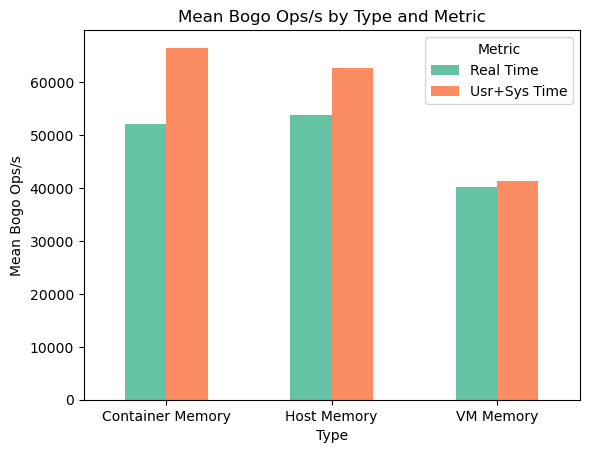

In [258]:
memory_data['Bogo Ops/s'] = pd.to_numeric(memory_data['Bogo Ops/s'], errors='coerce')
mean_values = memory_data.groupby(['Type', 'Metric'])['Bogo Ops/s'].mean().unstack()
palette = sns.color_palette("Set2", 3)  # You can try "Set1", "pastel", "colorblind", etc.

plt.figure(figsize=(10, 6))
# Plot the mean values
mean_values.plot(kind='bar', color=palette)

plt.title('Mean Bogo Ops/s by Type and Metric')
plt.ylabel('Mean Bogo Ops/s')
plt.xlabel('Type')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.show()

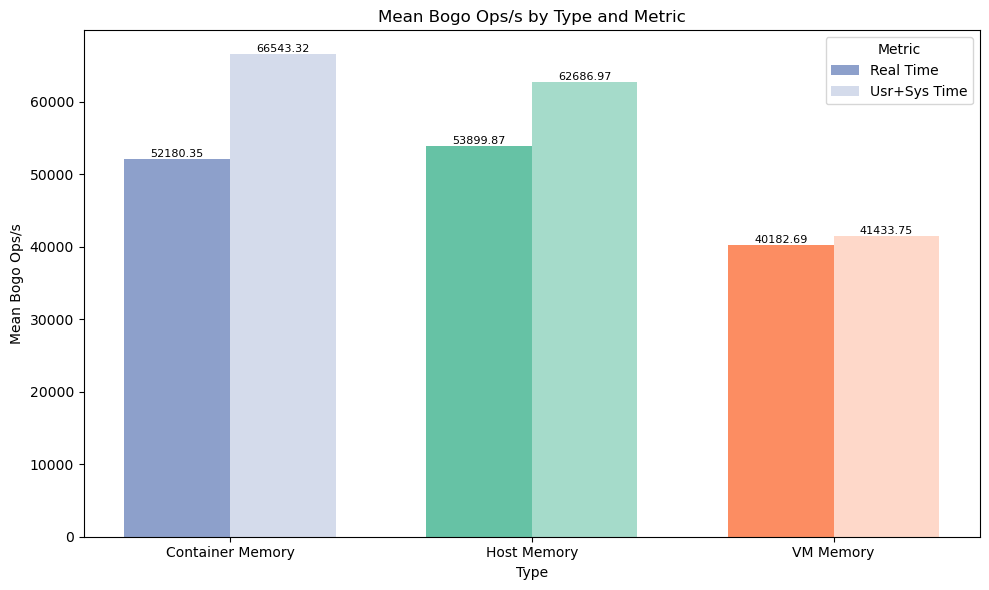

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import to_rgb, to_hex
import colorsys
import numpy as np

# Brightness helper
def adjust_brightness(color, factor):
    r, g, b = to_rgb(color)
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    new_r, new_g, new_b = colorsys.hls_to_rgb(h, min(1, l * factor), s)
    return to_hex((new_r, new_g, new_b))

# Colors for base types
base_colors = {
    'vm': sns.color_palette("Set2")[1],         # orange
    'container': sns.color_palette("Set2")[2],  # blue
    'host': sns.color_palette("Set2")[0]        # green
}

# Lighter variant for 'usr+sys time'
color_map = {}
for t in ['vm', 'container', 'host']:
    color_map[(t, 'real time')] = base_colors[t]
    color_map[(t, 'usr+sys time')] = adjust_brightness(base_colors[t], 1.3)

# Plot manually
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(mean_values.index))  # one bar group per Type

for i, metric in enumerate(mean_values.columns):  # ['real time', 'usr+sys time']
    offsets = x + (i - 0.5) * bar_width  # shift bars left and right
    heights = mean_values[metric].values
    colors = [color_map[(t.lower().split()[0], metric.lower())] for t in mean_values.index]
    bars = ax.bar(offsets, heights, width=bar_width, color=colors, label=metric)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

# Axes setup
ax.set_title('Mean Bogo Ops/s by Type and Metric')
ax.set_ylabel('Mean Bogo Ops/s')
ax.set_xlabel('Type')
ax.set_xticks(x)
ax.set_xticklabels(mean_values.index, rotation=0)
ax.legend(title='Metric')
plt.tight_layout()
plt.show()


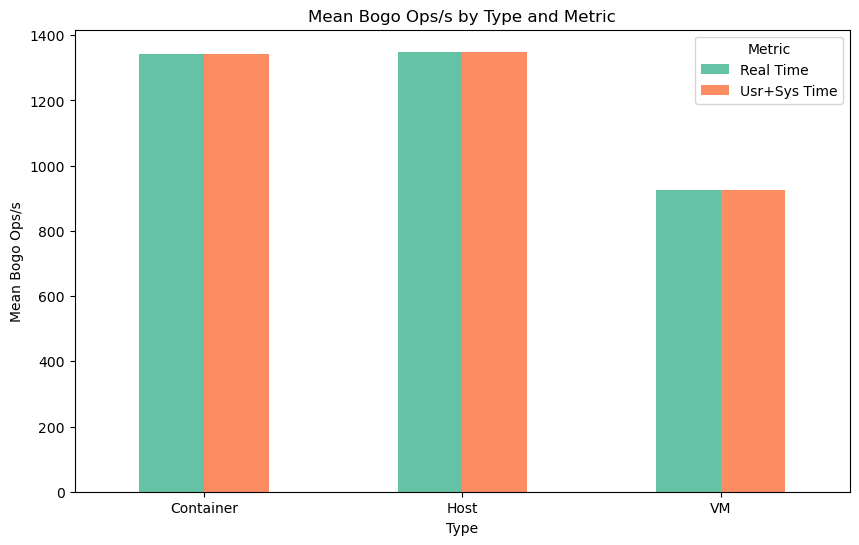

In [260]:
cpu_data['Bogo Ops/s'] = pd.to_numeric(cpu_data['Bogo Ops/s'], errors='coerce')
mean_values = cpu_data.groupby(['Type', 'Metric'])['Bogo Ops/s'].mean().unstack()

mean_values.plot(kind='bar', figsize=(10, 6), color=palette)
plt.title('Mean Bogo Ops/s by Type and Metric')
plt.ylabel('Mean Bogo Ops/s')
plt.xlabel('Type')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.show()

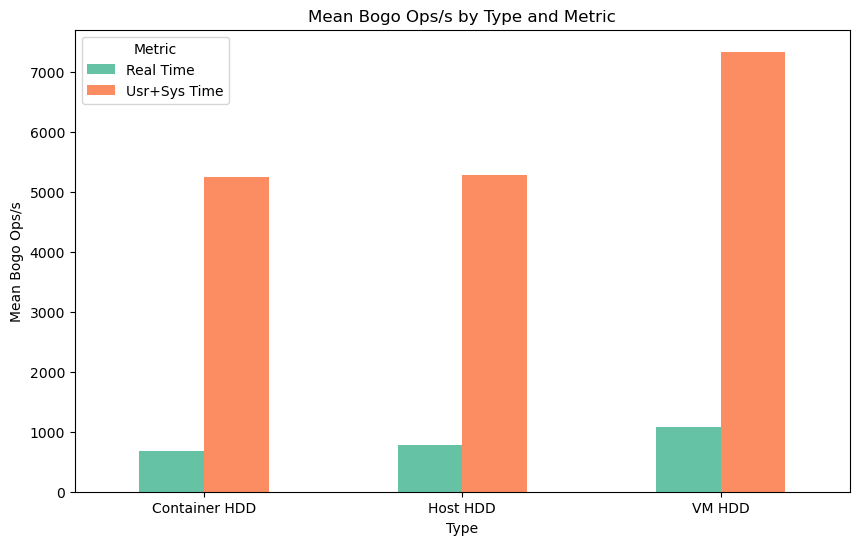

In [261]:
hdd_data['Bogo Ops/s'] = pd.to_numeric(hdd_data['Bogo Ops/s'], errors='coerce')
mean_values = hdd_data.groupby(['Type', 'Metric'])['Bogo Ops/s'].mean().unstack()

mean_values.plot(kind='bar', figsize=(10, 6), color=palette)
plt.title('Mean Bogo Ops/s by Type and Metric')
plt.ylabel('Mean Bogo Ops/s')
plt.xlabel('Type')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.show()

# `sysbench`

In [262]:
sysbench_cpu = pd.read_csv('sysbench - cpu.csv')
sysbench_cpu.head()

,support,events_per_sec,total_time,total_events,latency_min,latency_avg,latency_max,latency_95th,latency_sum,fairness_events_avg,fairness_events_stddev,fairness_time_avg,fairness_time_stddev
0,vm,453.61,10.0004,4537,2.03,2.20,7.37,2.35,9997.35,4537,0,9.9973,0
1,vm,454.32,10.0004,4544,2.04,2.20,6.75,2.35,9997.37,4544,0,9.9974,0
2,vm,454.85,10.0018,4550,2.03,2.20,5.18,2.35,9998.86,4550,0,9.9989,0
3,vm,455.40,10.0008,4555,2.03,2.19,8.29,2.35,9998.04,4555,0,9.9980,0
4,vm,451.09,10.0009,4512,2.06,2.22,6.20,2.39,9997.94,4512,0,9.9979,0


/tmp/ipykernel_7886/3643925363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='events_per_sec', data=sysbench_cpu, palette='Set2')


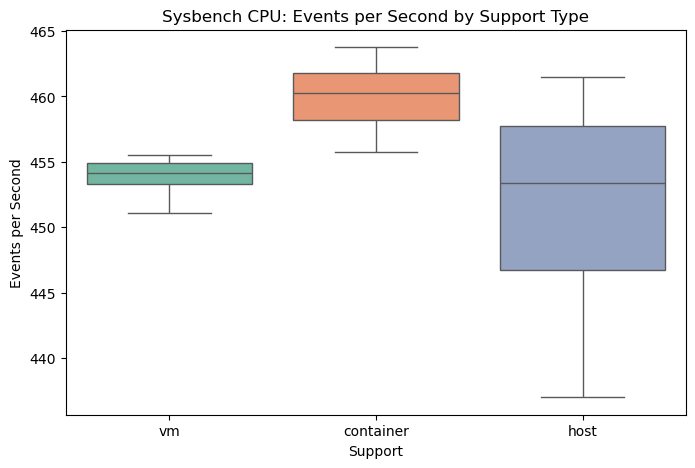

/tmp/ipykernel_7886/3643925363.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='latency_avg', data=sysbench_cpu, palette='Set2')


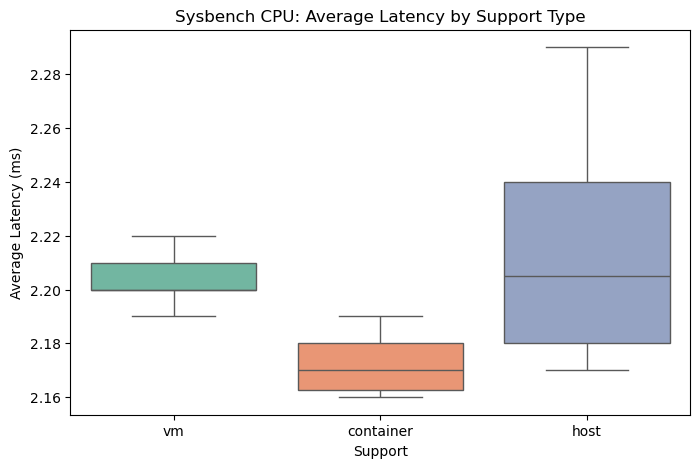

In [263]:
# Boxplot of events_per_sec by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='events_per_sec', data=sysbench_cpu, palette='Set2')
plt.title('Sysbench CPU: Events per Second by Support Type')
plt.ylabel('Events per Second')
plt.xlabel('Support')
plt.show()

# Boxplot of latency_avg by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='latency_avg', data=sysbench_cpu, palette='Set2')
plt.title('Sysbench CPU: Average Latency by Support Type')
plt.ylabel('Average Latency (ms)')
plt.xlabel('Support')
plt.show()

In [264]:
sysbench_memory = pd.read_csv('sysbench - memory.csv')
sysbench_memory.head()

,support,total_operations,ops_per_sec,transfer_mib,transfer_rate_mibs,total_time,latency_min,latency_avg,latency_max,latency_95th,latency_sum,fairness_events_avg,fairness_events_stddev,fairness_time_avg,fairness_time_stddev
0,vm,10485760,4084237.70,10240,3988.51,2.5659,0,0,2.51,0,1063.98,10485760,0,1.0665,0
1,vm,10485760,4050951.60,10240,3956.01,2.5869,0,0,1.67,0,1072.58,10485760,0,1.0726,0
2,vm,10485760,4031061.30,10240,3936.58,2.5991,0,0,1.34,0,1077.06,10485760,0,1.0771,0
3,vm,10485760,4095310.05,10240,3999.33,2.5589,0,0,0.90,0,1059.26,10485760,0,1.0593,0
4,vm,10485760,4080990.49,10240,3985.34,2.5675,0,0,0.90,0,1062.70,10485760,0,1.0627,0


/tmp/ipykernel_7886/1856619762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='ops_per_sec', data=sysbench_memory, palette='Set2')


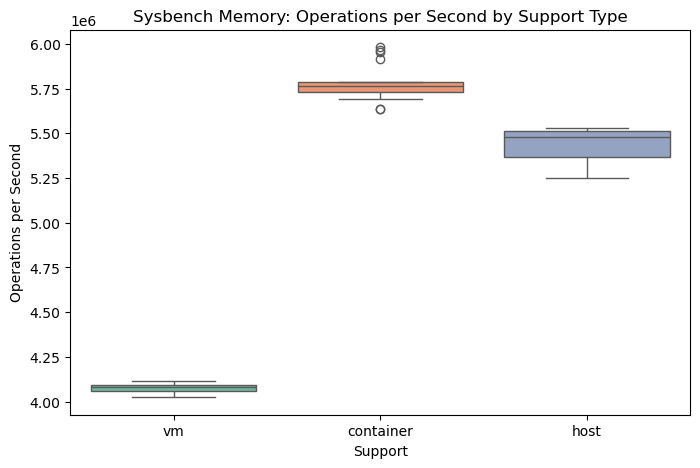

/tmp/ipykernel_7886/1856619762.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='transfer_rate_mibs', data=sysbench_memory, palette='Set2')


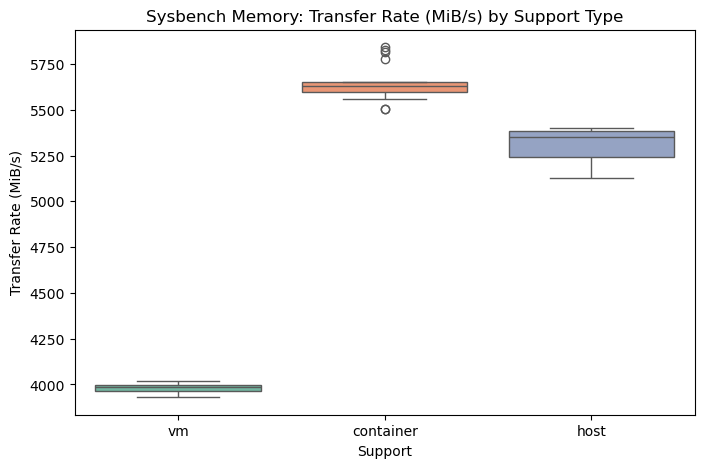

/tmp/ipykernel_7886/1856619762.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='total_time', data=sysbench_memory, palette='Set2')


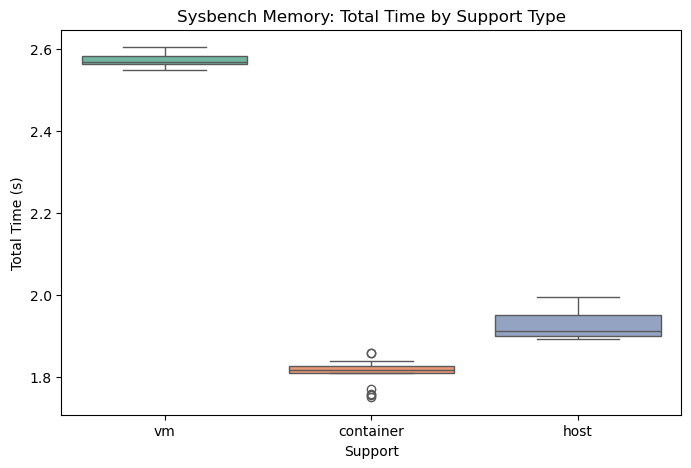

In [265]:
# Boxplot: ops_per_sec by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='ops_per_sec', data=sysbench_memory, palette='Set2')
plt.title('Sysbench Memory: Operations per Second by Support Type')
plt.ylabel('Operations per Second')
plt.xlabel('Support')
plt.show()

# Boxplot: transfer_rate_mibs by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='transfer_rate_mibs', data=sysbench_memory, palette='Set2')
plt.title('Sysbench Memory: Transfer Rate (MiB/s) by Support Type')
plt.ylabel('Transfer Rate (MiB/s)')
plt.xlabel('Support')
plt.show()

# Boxplot: total_time by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='total_time', data=sysbench_memory, palette='Set2')
plt.title('Sysbench Memory: Total Time by Support Type')
plt.ylabel('Total Time (s)')
plt.xlabel('Support')
plt.show()

# `iperf`

In [266]:
iperf_standard = pd.read_csv('iperf - standard.csv')
iperf_standard.head()

,Support,Link,Interval (sec),Transfer,Unnamed: 4,Bitrate,Unnamed: 6
0,vm,node01,0.00-1.00,367.0,MBytes,3.08,Gbits/sec
1,vm,node01,1.00-2.00,385.0,MBytes,3.23,Gbits/sec
2,vm,node01,2.00-3.00,392.0,MBytes,3.29,Gbits/sec
3,vm,node01,3.00-4.00,398.0,MBytes,3.34,Gbits/sec
4,vm,node01,4.00-5.00,406.0,MBytes,3.41,Gbits/sec


In [267]:
# Define a mapping for metric prefixes to their decimal multipliers
prefix_multipliers = {
    'K': 1e3,
    'M': 1e6,
    'G': 1e9
}

# Helper function to convert value and unit to decimal
def convert_with_unit(value, unit):
    if pd.isnull(value) or pd.isnull(unit):
        return value
    unit = str(unit)
    for prefix, multiplier in prefix_multipliers.items():
        if unit.startswith(prefix):
            return float(value) * multiplier
    return float(value)

# Convert 'Transfer' and 'Bitrate' columns to decimal format
iperf_standard['Transfer (Bytes)'] = [
    convert_with_unit(val, unit) for val, unit in zip(iperf_standard['Transfer'], iperf_standard['Unnamed: 4'])
]
iperf_standard['Bitrate (bits/sec)'] = [
    convert_with_unit(val, unit) for val, unit in zip(iperf_standard['Bitrate'], iperf_standard['Unnamed: 6'])
]

# Drop the old columns and rename for clarity
iperf_standard = iperf_standard.drop(columns=['Transfer', 'Unnamed: 4', 'Bitrate', 'Unnamed: 6'])

In [268]:
iperf_standard.head()

,Support,Link,Interval (sec),Transfer (Bytes),Bitrate (bits/sec)
0,vm,node01,0.00-1.00,367000000.0,3.080000e+09
1,vm,node01,1.00-2.00,385000000.0,3.230000e+09
2,vm,node01,2.00-3.00,392000000.0,3.290000e+09
3,vm,node01,3.00-4.00,398000000.0,3.340000e+09
4,vm,node01,4.00-5.00,406000000.0,3.410000e+09


/tmp/ipykernel_7886/1222710755.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Support', y='Bitrate (bits/sec)', data=iperf_standard, estimator=np.mean, ci='sd')


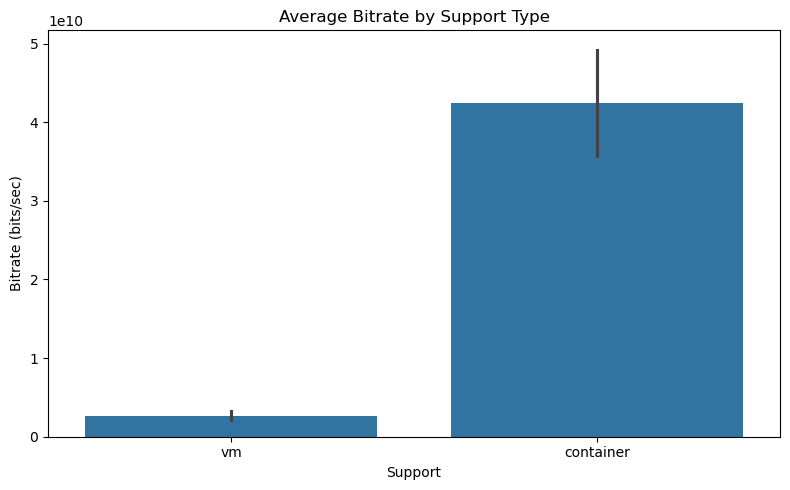

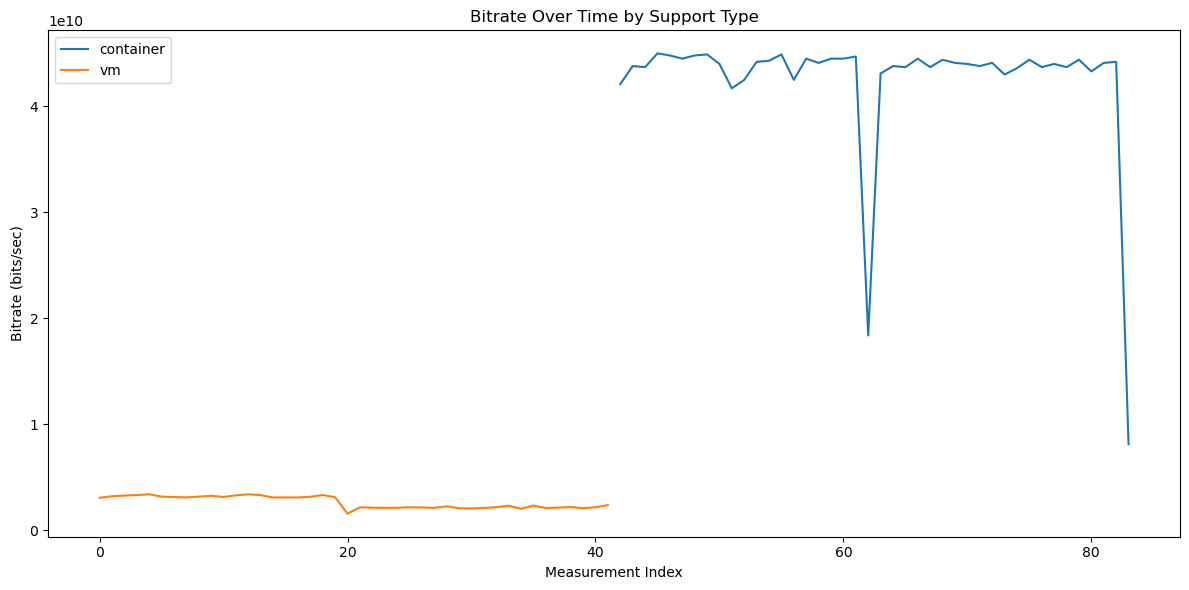

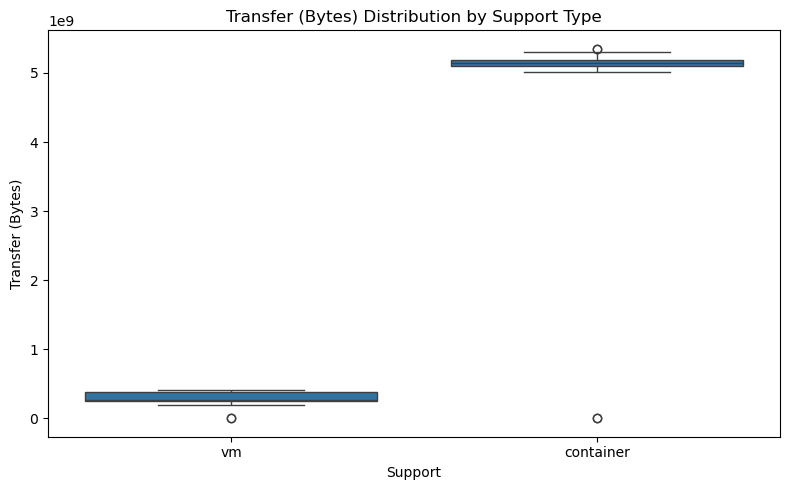

In [269]:
# Plot average Bitrate by Support type
plt.figure(figsize=(8, 5))
sns.barplot(x='Support', y='Bitrate (bits/sec)', data=iperf_standard, estimator=np.mean, ci='sd')
plt.title('Average Bitrate by Support Type')
plt.ylabel('Bitrate (bits/sec)')
plt.xlabel('Support')
plt.tight_layout()
plt.show()

# Plot Bitrate over time for each Support type
plt.figure(figsize=(12, 6))
for support, group in iperf_standard.groupby('Support'):
    plt.plot(group.index, group['Bitrate (bits/sec)'], label=support)
plt.title('Bitrate Over Time by Support Type')
plt.ylabel('Bitrate (bits/sec)')
plt.xlabel('Measurement Index')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Transfer (Bytes) distribution by Support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Support', y='Transfer (Bytes)', data=iperf_standard)
plt.title('Transfer (Bytes) Distribution by Support Type')
plt.ylabel('Transfer (Bytes)')
plt.xlabel('Support')
plt.tight_layout()
plt.show()

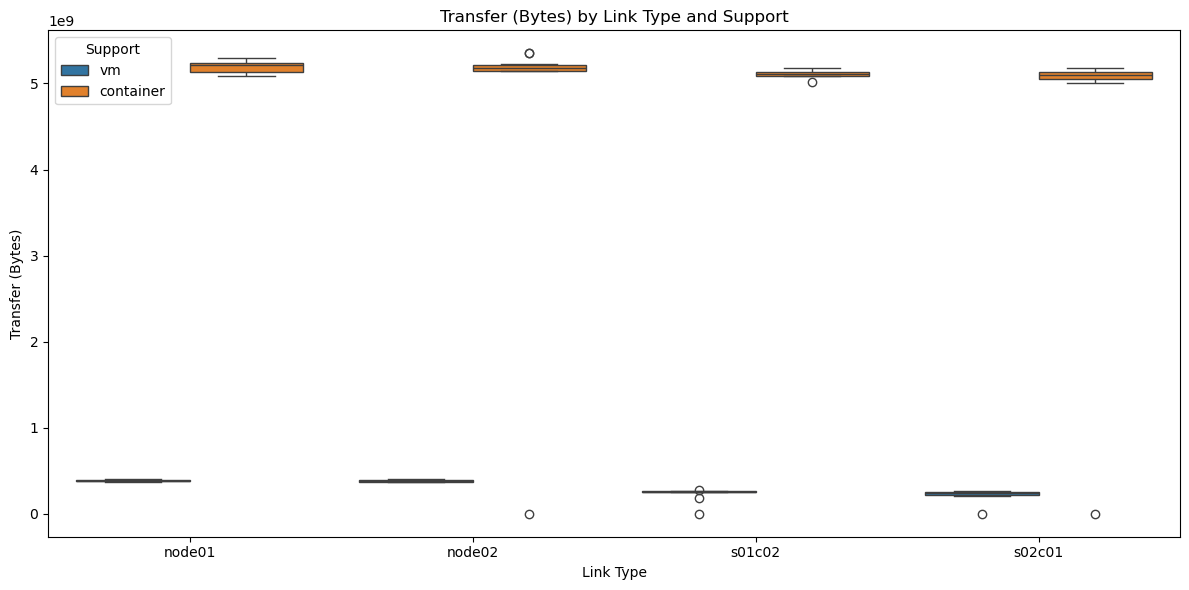

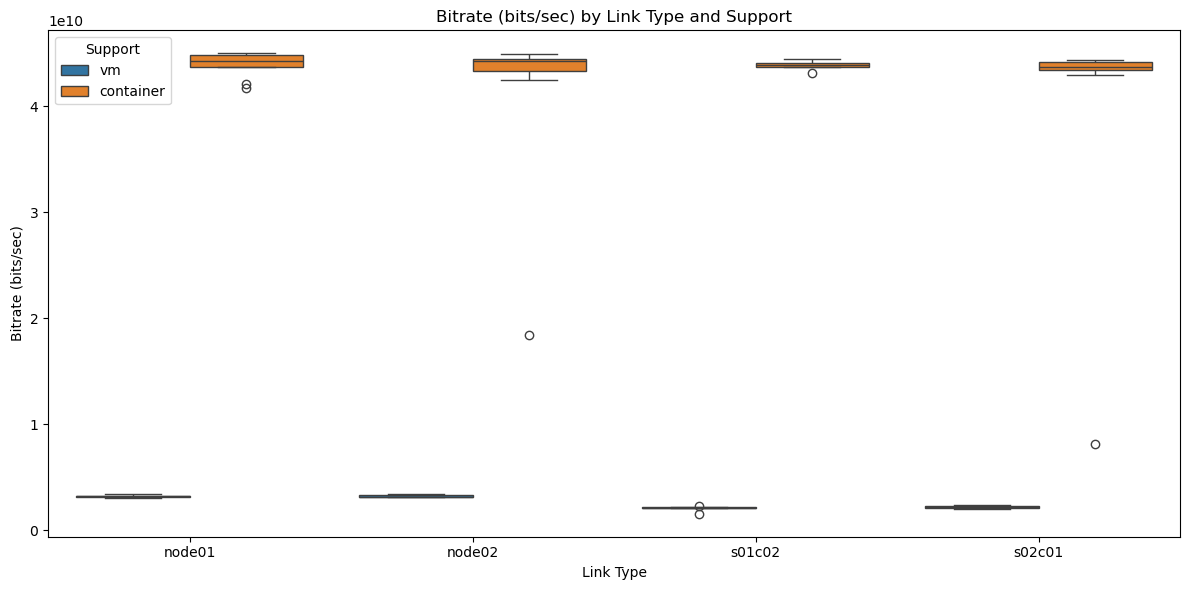

In [270]:
# Plot Transfer (Bytes) grouped by Support and Link type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Link', y='Transfer (Bytes)', hue='Support', data=iperf_standard)
plt.title('Transfer (Bytes) by Link Type and Support')
plt.ylabel('Transfer (Bytes)')
plt.xlabel('Link Type')
plt.legend(title='Support')
plt.tight_layout()
plt.show()

# Plot Bitrate (bits/sec) grouped by Support and Link type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Link', y='Bitrate (bits/sec)', hue='Support', data=iperf_standard)
plt.title('Bitrate (bits/sec) by Link Type and Support')
plt.ylabel('Bitrate (bits/sec)')
plt.xlabel('Link Type')
plt.legend(title='Support')
plt.tight_layout()
plt.show()

# `iozone`

## writer on shared folder

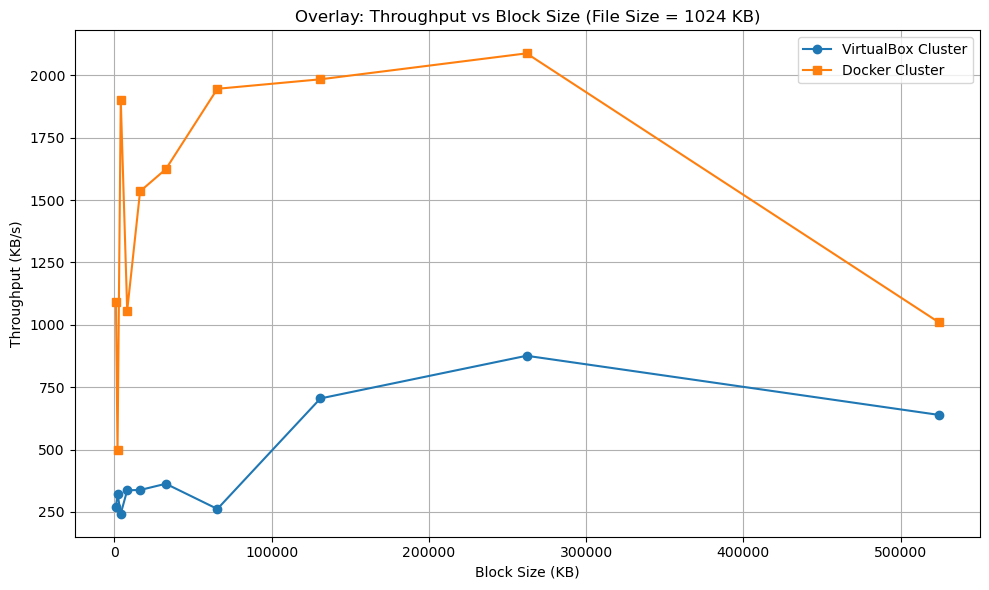

In [271]:
# Load both CSV files
vbox_df = pd.read_csv("vm_sh_writer_report.csv")
docker_df = pd.read_csv("doc_sh_writer_report.csv")

# Convert 'block_size' to index
vbox_df.set_index('block_size', inplace=True)
docker_df.set_index('block_size', inplace=True)

# Convert column headers to strings (ensure consistency)
vbox_df.columns = vbox_df.columns.astype(str)
docker_df.columns = docker_df.columns.astype(str)

# ----------- Overlay Line Plot -----------
def plot_overlay(file_size="1024"):
    plt.figure(figsize=(10, 6))
    plt.plot(vbox_df.index, vbox_df[file_size], marker='o', label='VirtualBox Cluster')
    plt.plot(docker_df.index, docker_df[file_size], marker='s', label='Docker Cluster')
    plt.xlabel("Block Size (KB)")
    plt.ylabel("Throughput (KB/s)")
    plt.title(f"Overlay: Throughput vs Block Size (File Size = {file_size} KB)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----------- Run Plots -----------
plot_overlay(file_size="1024")


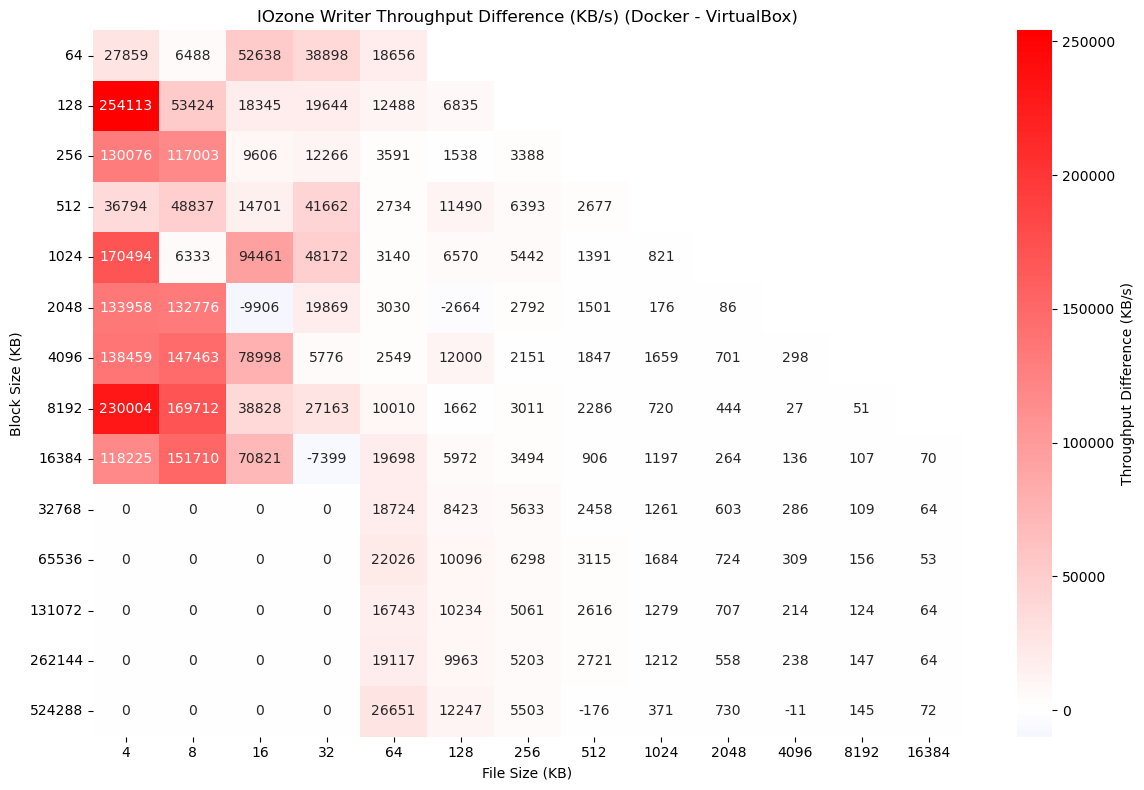

In [272]:
# Load CSV files
vbox_df = pd.read_csv("vm_sh_writer_report.csv")
docker_df = pd.read_csv("doc_sh_writer_report.csv")

# Set 'block_size' as the index
vbox_df.set_index('block_size', inplace=True)
docker_df.set_index('block_size', inplace=True)

# Convert all column headers to integers for sorting
vbox_df.columns = vbox_df.columns.astype(int)
docker_df.columns = docker_df.columns.astype(int)
vbox_df.index = vbox_df.index.astype(int)
docker_df.index = docker_df.index.astype(int)

# Sort rows and columns
vbox_df = vbox_df.sort_index().sort_index(axis=1)
docker_df = docker_df.sort_index().sort_index(axis=1)

# Calculate difference: Docker - VirtualBox
diff_df = docker_df.astype(float) - vbox_df.astype(float)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(diff_df, cmap="bwr", center=0, annot=True, fmt=".0f",
            cbar_kws={'label': 'Throughput Difference (KB/s)'})
plt.title("IOzone Writer Throughput Difference (KB/s) (Docker - VirtualBox)")
plt.xlabel("File Size (KB)")
plt.ylabel("Block Size (KB)")
plt.tight_layout()
plt.show()


## write local

In [273]:
# Load both CSV files
vbox_loc = pd.read_csv("vm_loc_writer_report.csv")
docker_loc = pd.read_csv("doc_loc_writer_report.csv")
host_loc = pd.read_csv("host_loc_writer_report.csv")

In [274]:
# Convert 'block_size' to index
vbox_loc.set_index('block_size', inplace=True)
docker_loc.set_index('block_size', inplace=True)
host_loc.set_index('block_size', inplace=True)

# Convert column headers to strings (ensure consistency)
vbox_loc.columns = vbox_loc.columns.astype(str)
docker_loc.columns = docker_loc.columns.astype(str)
host_loc.columns = host_loc.columns.astype(str)


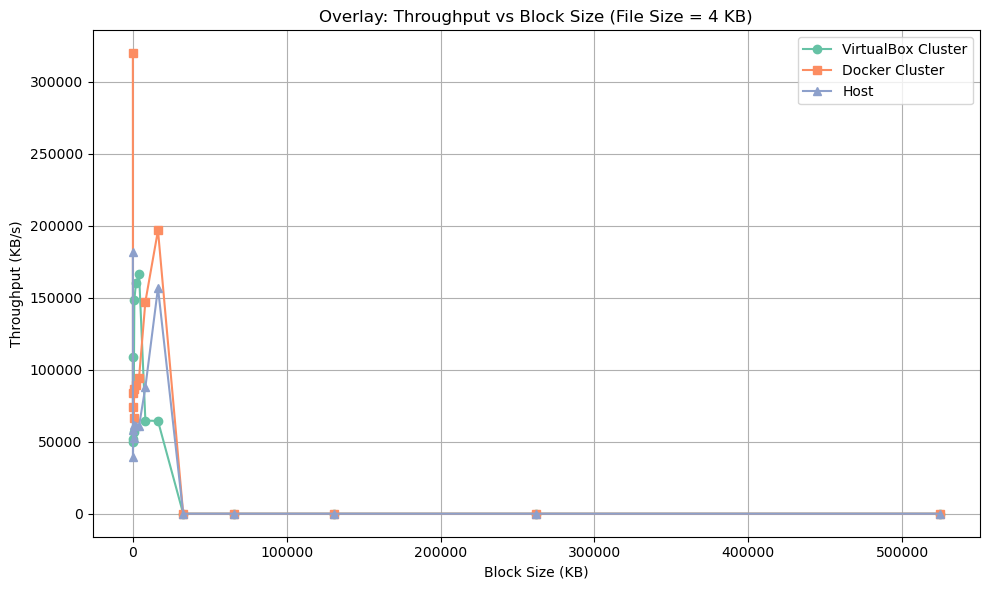

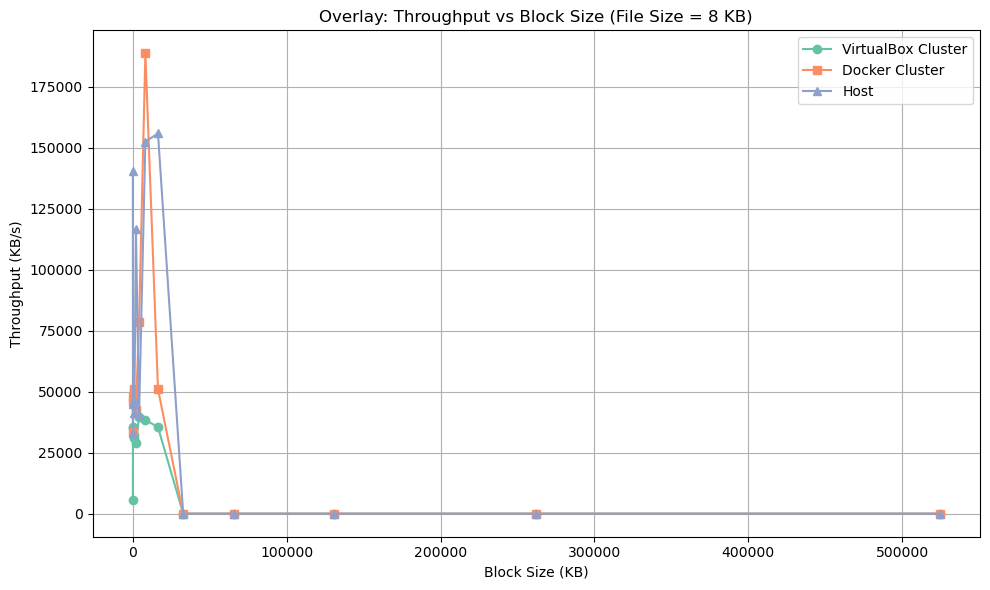

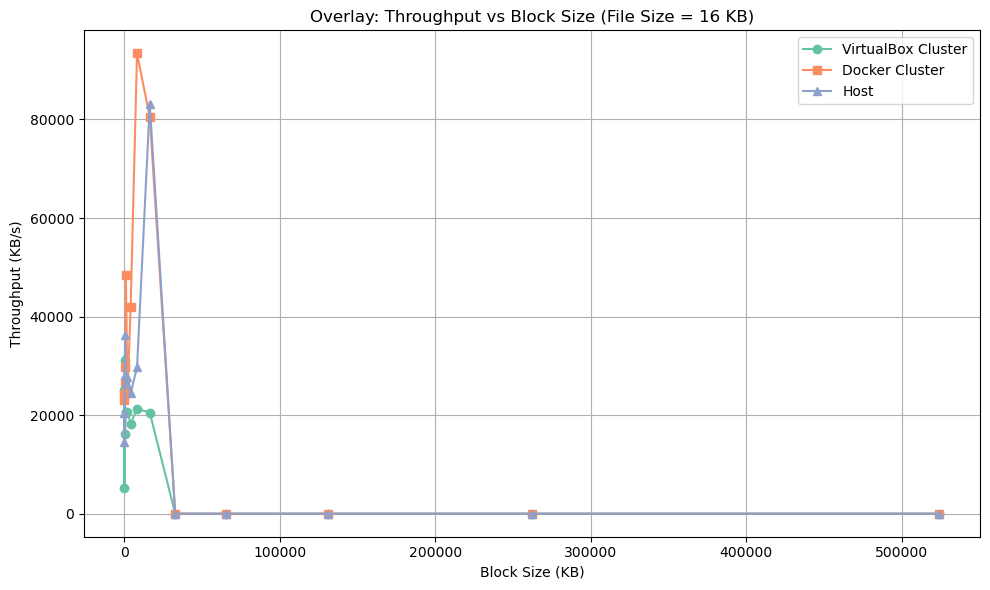

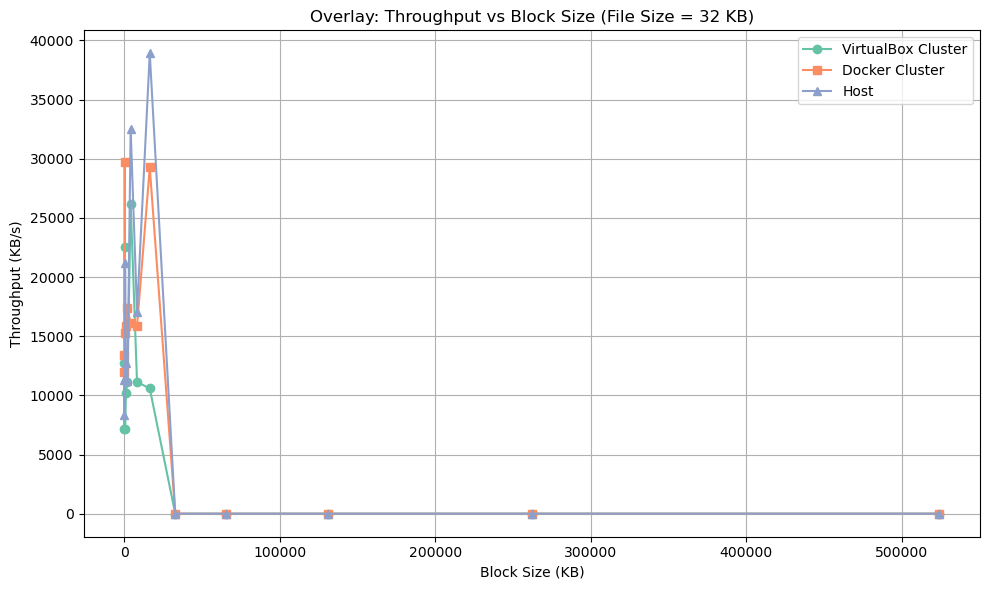

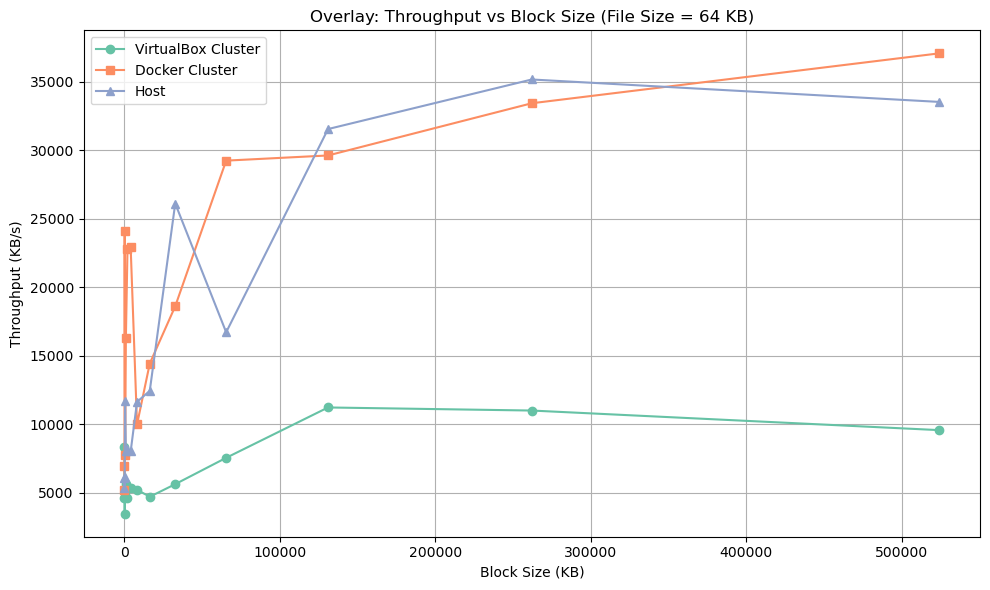

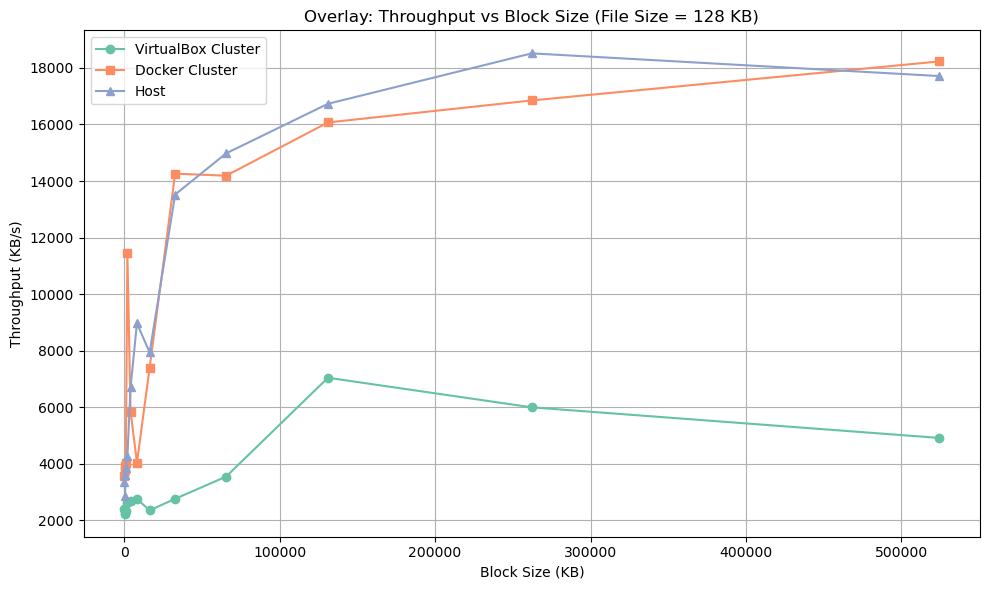

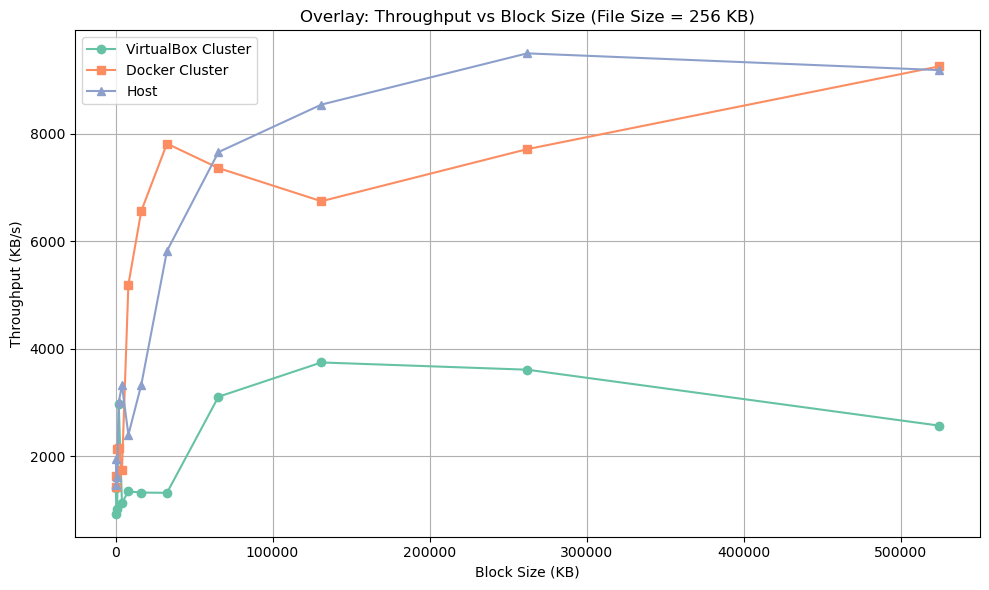

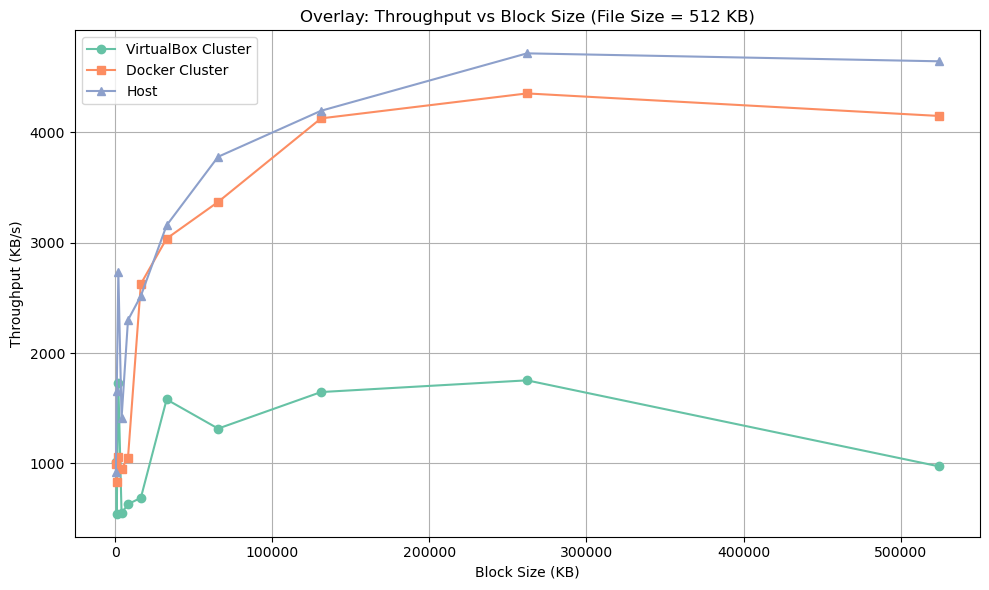

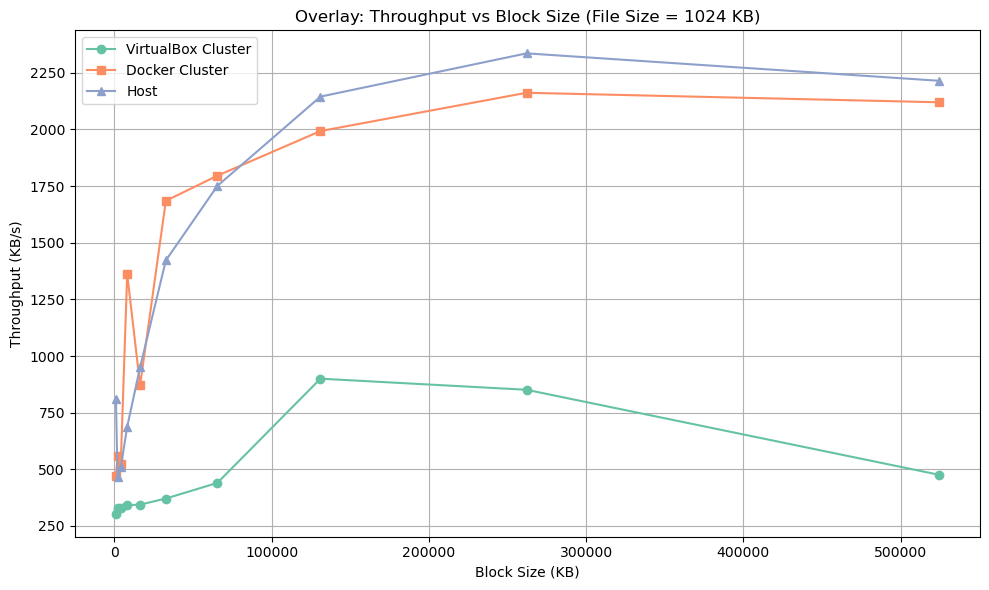

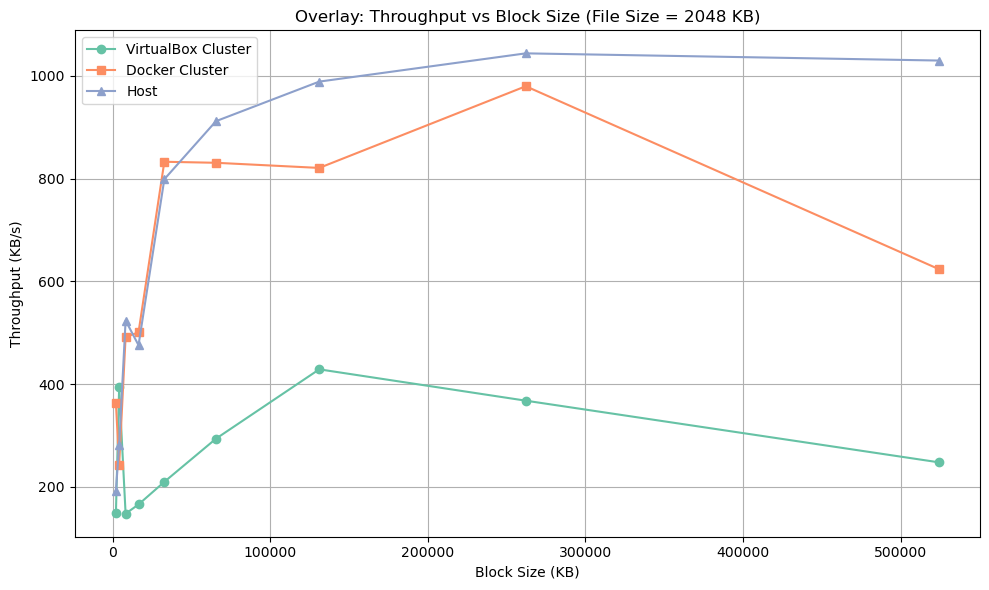

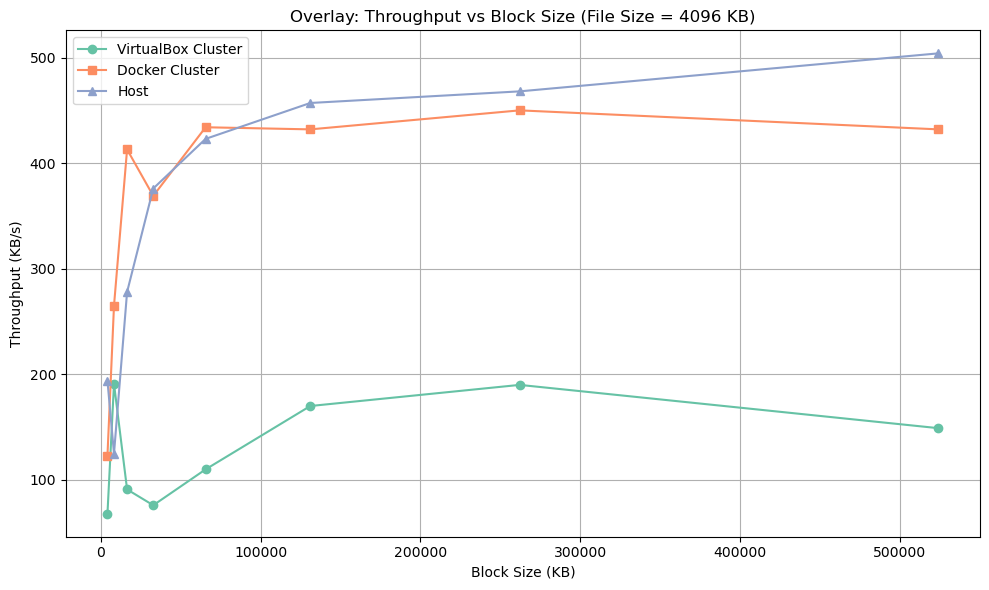

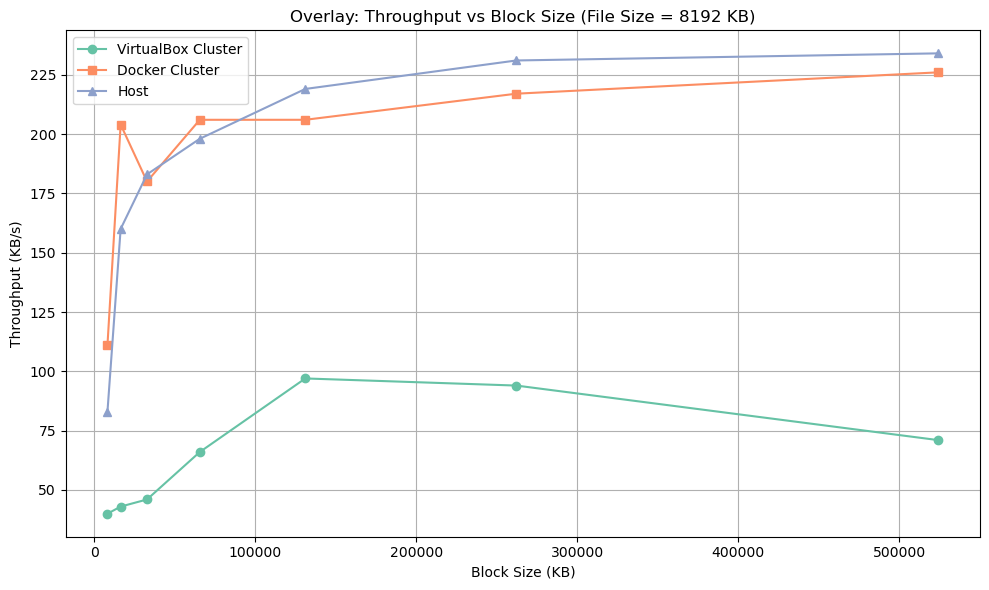

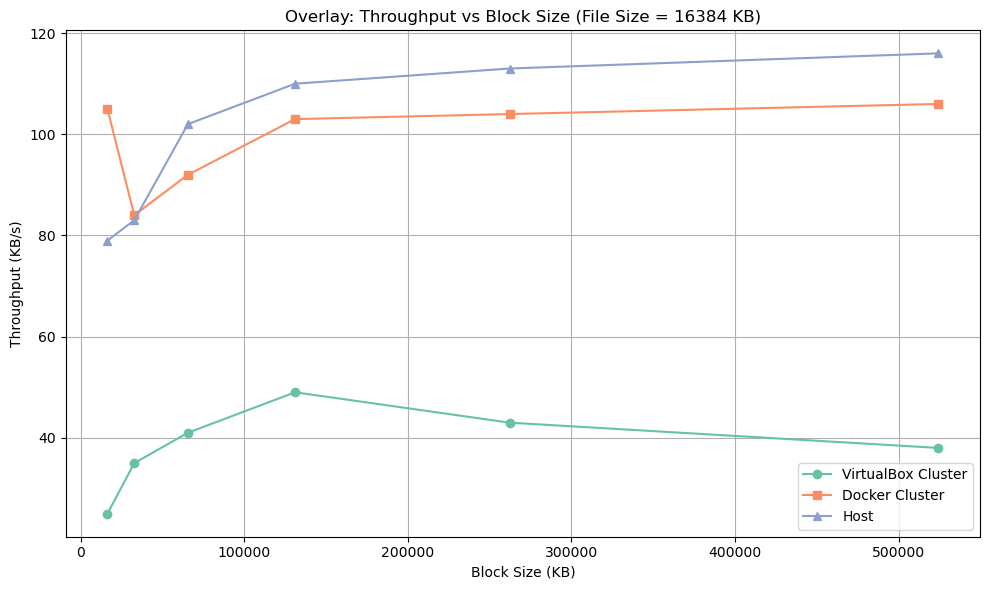

In [275]:

# ----------- Overlay Line Plot -----------
def plot_overlay(file_size="1024"):
    plt.figure(figsize=(10, 6))
    plt.plot(vbox_loc.index, vbox_loc[file_size], marker='o', label='VirtualBox Cluster', color=palette[0])
    plt.plot(docker_loc.index, docker_loc[file_size], marker='s', label='Docker Cluster', color=palette[1])
    plt.plot(host_loc.index, host_loc[file_size], marker='^', label='Host', color=palette[2])
    plt.xlabel("Block Size (KB)")
    plt.ylabel("Throughput (KB/s)")
    plt.title(f"Overlay: Throughput vs Block Size (File Size = {file_size} KB)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----------- Run Plots ----------- 


plot_overlay(file_size="4")
plot_overlay(file_size="8")
plot_overlay(file_size="16")
plot_overlay(file_size="32")
plot_overlay(file_size="64")
plot_overlay(file_size="128")
plot_overlay(file_size="256")
plot_overlay(file_size="512")
plot_overlay(file_size="1024")
plot_overlay(file_size="2048")
plot_overlay(file_size="4096")
plot_overlay(file_size="8192")
plot_overlay(file_size="16384")